# Exercises: Time Series Analysis - ACQUIRE
<a href = "https://ds.codeup.com/timeseries/quick_fix_acquire/#exercises">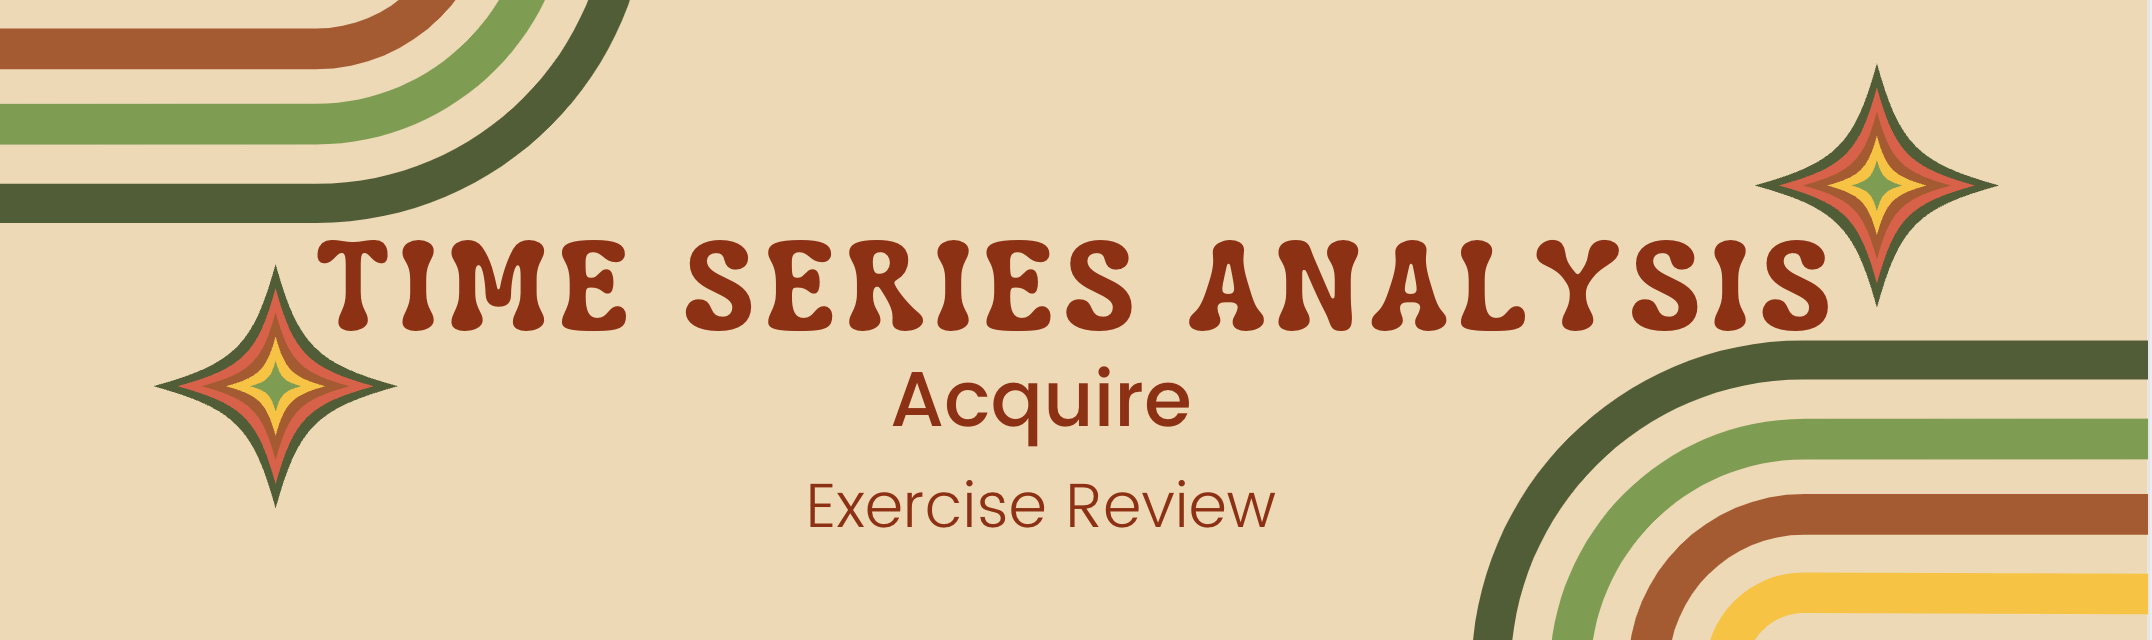</a>

<hr style="border:2px solid gray">

Create a new local git repository and remote repository on github named `time-series-exercises`. Save this work for this module in your `time-series-exercises` repo.

The end result of this exercise should be a file named `acquire.py`.

In [1]:
#standard ds imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

#imports
import os
import requests
import datetime
#import acquire
import math
from pprint import pprint

#set figure size
plt.rcParams["figure.figsize"] = (8,6)

#specify decimal places to display
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# 1. Using the code from the lesson as a guide and the REST API from https://swapi.dev/ as we did in the lesson, create a dataframe named `people` that has **all** of the data for people.

<div class="alert alert-block alert-info">
    
## Recall
    
The following are some "responses" that you may see when requesting APIs.

- 200- 206: Successful

- 401: Unauthorized

- 404: Not Found

- 500: Internal Server Error

</div>

In [2]:
#assign the api that we requested to a variable
response = requests.get('https://swapi.dev/api/people/')

#Let's look at the type of response we get
response

<Response [200]>

In [3]:
#assign data to the successful response (200)
data = response.json()

#take a look at the json
data

{'count': 82,
 'next': 'https://swapi.dev/api/people/?page=2',
 'previous': None,
 'results': [{'name': 'Luke Skywalker',
   'height': '172',
   'mass': '77',
   'hair_color': 'blond',
   'skin_color': 'fair',
   'eye_color': 'blue',
   'birth_year': '19BBY',
   'gender': 'male',
   'homeworld': 'https://swapi.dev/api/planets/1/',
   'films': ['https://swapi.dev/api/films/1/',
    'https://swapi.dev/api/films/2/',
    'https://swapi.dev/api/films/3/',
    'https://swapi.dev/api/films/6/'],
   'species': [],
   'vehicles': ['https://swapi.dev/api/vehicles/14/',
    'https://swapi.dev/api/vehicles/30/'],
   'starships': ['https://swapi.dev/api/starships/12/',
    'https://swapi.dev/api/starships/22/'],
   'created': '2014-12-09T13:50:51.644000Z',
   'edited': '2014-12-20T21:17:56.891000Z',
   'url': 'https://swapi.dev/api/people/1/'},
  {'name': 'C-3PO',
   'height': '167',
   'mass': '75',
   'hair_color': 'n/a',
   'skin_color': 'gold',
   'eye_color': 'yellow',
   'birth_year': '112BB

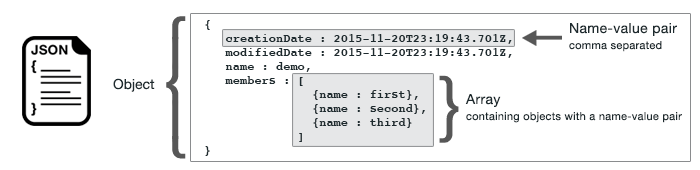

In [4]:
base_url = "https://swapi.dev/api/"
ppl_url = base_url + "people/"

ppl_url

'https://swapi.dev/api/people/'

In [5]:
requests.get(ppl_url + "?page=1").json()['results'][0]

{'name': 'Luke Skywalker',
 'height': '172',
 'mass': '77',
 'hair_color': 'blond',
 'skin_color': 'fair',
 'eye_color': 'blue',
 'birth_year': '19BBY',
 'gender': 'male',
 'homeworld': 'https://swapi.dev/api/planets/1/',
 'films': ['https://swapi.dev/api/films/1/',
  'https://swapi.dev/api/films/2/',
  'https://swapi.dev/api/films/3/',
  'https://swapi.dev/api/films/6/'],
 'species': [],
 'vehicles': ['https://swapi.dev/api/vehicles/14/',
  'https://swapi.dev/api/vehicles/30/'],
 'starships': ['https://swapi.dev/api/starships/12/',
  'https://swapi.dev/api/starships/22/'],
 'created': '2014-12-09T13:50:51.644000Z',
 'edited': '2014-12-20T21:17:56.891000Z',
 'url': 'https://swapi.dev/api/people/1/'}

In [6]:
for i in range(3):
    print(ppl_url + f"?page={i+1}")

https://swapi.dev/api/people/?page=1
https://swapi.dev/api/people/?page=2
https://swapi.dev/api/people/?page=3


In [13]:
page_results = []

data1 = requests.get(ppl_url + "?page=1").json()

number_of_people = data1['count']
number_of_results = len(data1['results'])

max_page = math.ceil(number_of_people / number_of_results)
#print(max_page)
for i in range(max_page):
    ppl_pg = ppl_url + f"?page={i+1}"
    #print(ppl_pg)
    data = requests.get(ppl_pg).json()
    #print(data['results'])
    for r in range(len(data['results'])):
        person = data['results'][r]
        page_results.append(person)
#pprint(page_results)

ppl_df = pd.DataFrame(page_results)

In [14]:
ppl_df

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/
3,Darth Vader,202,136,none,white,yellow,41.9BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[https://swapi.dev/api/starships/13/],2014-12-10T15:18:20.704000Z,2014-12-20T21:17:50.313000Z,https://swapi.dev/api/people/4/
4,Leia Organa,150,49,brown,light,brown,19BBY,female,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[https://swapi.dev/api/vehicles/30/],[],2014-12-10T15:20:09.791000Z,2014-12-20T21:17:50.315000Z,https://swapi.dev/api/people/5/
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,Grievous,216,159,none,"brown, white","green, yellow",unknown,male,https://swapi.dev/api/planets/59/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/36/],[https://swapi.dev/api/vehicles/60/],[https://swapi.dev/api/starships/74/],2014-12-20T19:43:53.348000Z,2014-12-20T21:17:50.488000Z,https://swapi.dev/api/people/79/
78,Tarfful,234,136,brown,brown,blue,unknown,male,https://swapi.dev/api/planets/14/,[https://swapi.dev/api/films/6/],[https://swapi.dev/api/species/3/],[],[],2014-12-20T19:46:34.209000Z,2014-12-20T21:17:50.491000Z,https://swapi.dev/api/people/80/
79,Raymus Antilles,188,79,brown,light,brown,unknown,male,https://swapi.dev/api/planets/2/,"[https://swapi.dev/api/films/1/, https://swapi...",[],[],[],2014-12-20T19:49:35.583000Z,2014-12-20T21:17:50.493000Z,https://swapi.dev/api/people/81/
80,Sly Moore,178,48,none,pale,white,unknown,female,https://swapi.dev/api/planets/60/,"[https://swapi.dev/api/films/5/, https://swapi...",[],[],[],2014-12-20T20:18:37.619000Z,2014-12-20T21:17:50.496000Z,https://swapi.dev/api/people/82/


In [15]:
ppl_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 82 entries, 0 to 81
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        82 non-null     object
 1   height      82 non-null     object
 2   mass        82 non-null     object
 3   hair_color  82 non-null     object
 4   skin_color  82 non-null     object
 5   eye_color   82 non-null     object
 6   birth_year  82 non-null     object
 7   gender      82 non-null     object
 8   homeworld   82 non-null     object
 9   films       82 non-null     object
 10  species     82 non-null     object
 11  vehicles    82 non-null     object
 12  starships   82 non-null     object
 13  created     82 non-null     object
 14  edited      82 non-null     object
 15  url         82 non-null     object
dtypes: object(16)
memory usage: 10.4+ KB


# 2. Do the same thing, but for `planets`.

In [11]:
base_url = "https://swapi.dev/api/"
planet_url = base_url + "planets/"


In [20]:
#request planets api
response = requests.get(planet_url)
data = response.json()

In [21]:
#turn 'data' within the json into a dataframe
planet_df = pd.DataFrame(data['results'])

In [22]:
#look at planets df
planet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             10 non-null     object
 1   rotation_period  10 non-null     object
 2   orbital_period   10 non-null     object
 3   diameter         10 non-null     object
 4   climate          10 non-null     object
 5   gravity          10 non-null     object
 6   terrain          10 non-null     object
 7   surface_water    10 non-null     object
 8   population       10 non-null     object
 9   residents        10 non-null     object
 10  films            10 non-null     object
 11  created          10 non-null     object
 12  edited           10 non-null     object
 13  url              10 non-null     object
dtypes: object(14)
memory usage: 1.2+ KB


In [23]:
while data['next'] != None:
    print(data['next'])
    response = requests.get(data['next'])
    data = response.json()
    planet_df = pd.concat([planet_df, pd.DataFrame(data['results'])], ignore_index=True)

https://swapi.dev/api/planets/?page=2
https://swapi.dev/api/planets/?page=3
https://swapi.dev/api/planets/?page=4
https://swapi.dev/api/planets/?page=5
https://swapi.dev/api/planets/?page=6


In [24]:
planet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name             60 non-null     object
 1   rotation_period  60 non-null     object
 2   orbital_period   60 non-null     object
 3   diameter         60 non-null     object
 4   climate          60 non-null     object
 5   gravity          60 non-null     object
 6   terrain          60 non-null     object
 7   surface_water    60 non-null     object
 8   population       60 non-null     object
 9   residents        60 non-null     object
 10  films            60 non-null     object
 11  created          60 non-null     object
 12  edited           60 non-null     object
 13  url              60 non-null     object
dtypes: object(14)
memory usage: 6.7+ KB


<div class="alert alert-block alert-success">
<b>Takeaways:</b>
<br>
    
- Concatinating the additional pages onto the dataframe changed the shape from 10 entries (1 page), to 60 entries (6 pages)
</div>

# 3. Extract the data for `starships`.

In [25]:
base_url = "https://swapi.dev/api/"
ships_url = base_url + "starships/"

In [26]:
#request starships api
response = requests.get(ships_url)
data = response.json()

In [27]:
#turn that into a dataframe
starships_df = pd.DataFrame(data['results'])
#take a look
starships_df.info()
starships_df.head(3)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    10 non-null     object
 1   model                   10 non-null     object
 2   manufacturer            10 non-null     object
 3   cost_in_credits         10 non-null     object
 4   length                  10 non-null     object
 5   max_atmosphering_speed  10 non-null     object
 6   crew                    10 non-null     object
 7   passengers              10 non-null     object
 8   cargo_capacity          10 non-null     object
 9   consumables             10 non-null     object
 10  hyperdrive_rating       10 non-null     object
 11  MGLT                    10 non-null     object
 12  starship_class          10 non-null     object
 13  pilots                  10 non-null     object
 14  films                   10 non-null     object
 15  created  

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/


In [28]:
while data['next'] != None:
    print(data['next'])
    response = requests.get(data['next'])
    data = response.json()
    starships_df = pd.concat([starships_df, pd.DataFrame(data['results'])], ignore_index=True)

https://swapi.dev/api/starships/?page=2
https://swapi.dev/api/starships/?page=3
https://swapi.dev/api/starships/?page=4


In [29]:
starships_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 18 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   name                    36 non-null     object
 1   model                   36 non-null     object
 2   manufacturer            36 non-null     object
 3   cost_in_credits         36 non-null     object
 4   length                  36 non-null     object
 5   max_atmosphering_speed  36 non-null     object
 6   crew                    36 non-null     object
 7   passengers              36 non-null     object
 8   cargo_capacity          36 non-null     object
 9   consumables             36 non-null     object
 10  hyperdrive_rating       36 non-null     object
 11  MGLT                    36 non-null     object
 12  starship_class          36 non-null     object
 13  pilots                  36 non-null     object
 14  films                   36 non-null     object
 15  created 

# 4. Save the data in your files to local csv files so that it will be faster to access in the future.

In [32]:
def get_swapi_data(endpoint):
    '''
    This function will:  
    - creates a csv of `endpoint` data if one does not exist
        - if one already exists, it uses the existing csv 
    - outputs data as a dataframe.
    
    endpoint formatting: "planets"
    '''
    base_url = "https://swapi.dev/api/"
    
    if os.path.isfile(f'{endpoint}.csv'):
        df = pd.read_csv(f'{endpoint}.csv', index_col=0)
    
    else:
        response = requests.get(base_url + endpoint + "/")
        data = response.json()
        df = pd.DataFrame(data['results'])
        while data['next'] != None:
            print(data['next'])
            response = requests.get(data['next'])
            data = response.json()
            df = pd.concat([df, pd.DataFrame(data['results'])], ignore_index=True)
        df.to_csv(f'{endpoint}.csv')

    return df

In [34]:
starship = get_swapi_data("starships")
starship.head(3)

https://swapi.dev/api/starships/?page=2
https://swapi.dev/api/starships/?page=3
https://swapi.dev/api/starships/?page=4


,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/


In [35]:
people = get_swapi_data("people")
people.head(3)

https://swapi.dev/api/people/?page=2
https://swapi.dev/api/people/?page=3
https://swapi.dev/api/people/?page=4
https://swapi.dev/api/people/?page=5
https://swapi.dev/api/people/?page=6
https://swapi.dev/api/people/?page=7
https://swapi.dev/api/people/?page=8
https://swapi.dev/api/people/?page=9


,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/


In [36]:
planet = get_swapi_data("planets")
planet.head(3)

https://swapi.dev/api/planets/?page=2
https://swapi.dev/api/planets/?page=3
https://swapi.dev/api/planets/?page=4
https://swapi.dev/api/planets/?page=5
https://swapi.dev/api/planets/?page=6


,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/


# 5. Combine the data from your three separate dataframes into one large dataframe.

In [38]:
sw_ppl_planet_ship_df = pd.concat([people, starship, planet], axis = 0)
sw_ppl_planet_ship_df.head(3)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,...,pilots,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
sw_ppl_planet_ship_df.T

,0,1,2,3,4,5,6,7,8,9,...,50,51,52,53,54,55,56,57,58,59
name,Luke Skywalker,C-3PO,R2-D2,Darth Vader,Leia Organa,Owen Lars,Beru Whitesun lars,R5-D4,Biggs Darklighter,Obi-Wan Kenobi,...,Mirial,Serenno,Concord Dawn,Zolan,Ojom,Skako,Muunilinst,Shili,Kalee,Umbara
height,172,167,96,202,150,178,165,97,183,182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mass,77,75,32,136,49,120,75,32,84,77,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
hair_color,blond,n/a,n/a,none,brown,"brown, grey",brown,n/a,black,"auburn, white",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
skin_color,fair,gold,"white, blue",white,light,light,light,"white, red",light,fair,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
eye_color,blue,yellow,red,yellow,brown,blue,blue,red,brown,blue-gray,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
birth_year,19BBY,112BBY,33BBY,41.9BBY,19BBY,52BBY,47BBY,unknown,24BBY,57BBY,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,male,n/a,n/a,male,female,male,female,n/a,male,male,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
homeworld,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/8/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/2/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/20/,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
films,"[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/films/1/],[https://swapi.dev/api/films/1/],"[https://swapi.dev/api/films/1/, https://swapi...",...,[],[],[],[],[],[],[],[],[],[]


In [42]:
sw_ppl_planet_ship_df.tail().T

,55,56,57,58,59
name,Skako,Muunilinst,Shili,Kalee,Umbara
height,NaN,NaN,NaN,NaN,NaN
mass,NaN,NaN,NaN,NaN,NaN
hair_color,NaN,NaN,NaN,NaN,NaN
skin_color,NaN,NaN,NaN,NaN,NaN
eye_color,NaN,NaN,NaN,NaN,NaN
birth_year,NaN,NaN,NaN,NaN,NaN
gender,NaN,NaN,NaN,NaN,NaN
homeworld,NaN,NaN,NaN,NaN,NaN
films,[],[],[],[],[]


___

# [**PD.MERGE**]("https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.merge.html")

- Merge DataFrame or named Series objects with a database-style join.

In [45]:
people.head(3)

,name,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films,species,vehicles,starships,created,edited,url
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[],"[https://swapi.dev/api/vehicles/14/, https://s...","[https://swapi.dev/api/starships/12/, https://...",2014-12-09T13:50:51.644000Z,2014-12-20T21:17:56.891000Z,https://swapi.dev/api/people/1/
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:10:51.357000Z,2014-12-20T21:17:50.309000Z,https://swapi.dev/api/people/2/
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/species/2/],[],[],2014-12-10T15:11:50.376000Z,2014-12-20T21:17:50.311000Z,https://swapi.dev/api/people/3/


In [46]:
planet.head(3)

,name,rotation_period,orbital_period,diameter,climate,gravity,terrain,surface_water,population,residents,films,created,edited,url
0,Tatooine,23,304,10465,arid,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/
1,Alderaan,24,364,12500,temperate,1 standard,"grasslands, mountains",40,2000000000,"[https://swapi.dev/api/people/5/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T11:35:48.479000Z,2014-12-20T20:58:18.420000Z,https://swapi.dev/api/planets/2/
2,Yavin IV,24,4818,10200,"temperate, tropical",1 standard,"jungle, rainforests",8,1000,[],[https://swapi.dev/api/films/1/],2014-12-10T11:37:19.144000Z,2014-12-20T20:58:18.421000Z,https://swapi.dev/api/planets/3/


In [47]:
starship.head(3)

,name,model,manufacturer,cost_in_credits,length,max_atmosphering_speed,crew,passengers,cargo_capacity,consumables,hyperdrive_rating,MGLT,starship_class,pilots,films,created,edited,url
0,CR90 corvette,CR90 corvette,Corellian Engineering Corporation,3500000,150,950,30-165,600,3000000,1 year,2.0,60,corvette,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T14:20:33.369000Z,2014-12-20T21:23:49.867000Z,https://swapi.dev/api/starships/2/
1,Star Destroyer,Imperial I-class Star Destroyer,Kuat Drive Yards,150000000,"1,600",975,"47,060",n/a,36000000,2 years,2.0,60,Star Destroyer,[],"[https://swapi.dev/api/films/1/, https://swapi...",2014-12-10T15:08:19.848000Z,2014-12-20T21:23:49.870000Z,https://swapi.dev/api/starships/3/
2,Sentinel-class landing craft,Sentinel-class landing craft,"Sienar Fleet Systems, Cyngus Spaceworks",240000,38,1000,5,75,180000,1 month,1.0,70,landing craft,[],[https://swapi.dev/api/films/1/],2014-12-10T15:48:00.586000Z,2014-12-20T21:23:49.873000Z,https://swapi.dev/api/starships/5/


In [97]:
[','.join(map(str, l)) for l in merged_df['starships']]

['https://swapi.dev/api/starships/12/,https://swapi.dev/api/starships/22/',
 '',
 '',
 'https://swapi.dev/api/starships/13/',
 '',
 '',
 '',
 '',
 'https://swapi.dev/api/starships/12/',
 'https://swapi.dev/api/starships/48/,https://swapi.dev/api/starships/59/,https://swapi.dev/api/starships/64/,https://swapi.dev/api/starships/65/,https://swapi.dev/api/starships/74/',
 'https://swapi.dev/api/starships/39/,https://swapi.dev/api/starships/59/,https://swapi.dev/api/starships/65/',
 '',
 'https://swapi.dev/api/starships/10/,https://swapi.dev/api/starships/22/',
 'https://swapi.dev/api/starships/10/,https://swapi.dev/api/starships/22/',
 '',
 '',
 'https://swapi.dev/api/starships/12/',
 'https://swapi.dev/api/starships/12/',
 '',
 '',
 'https://swapi.dev/api/starships/21/',
 '',
 '',
 'https://swapi.dev/api/starships/10/',
 '',
 '',
 '',
 'https://swapi.dev/api/starships/28/',
 '',
 'https://swapi.dev/api/starships/10/',
 '',
 '',
 '',
 'https://swapi.dev/api/starships/39/,https://swapi.dev/

In [109]:
#left join planet df onto people on people.homeworld = planet.url
ppl_planet_df = pd.merge(people, planet, left_on='homeworld', right_on='url', how='left', suffixes=['_people', '_planets'])

# Convert Starships col of LISTs into strings
ppl_planet_df['starships'] = [', '.join(map(str, l)) for l in ppl_planet_df['starships']]



#merged_df['starships'].replace(["[", "]", "'"], "")
#(f"{merged_df.iloc[0]['starships']}").replace("[", "").replace("[", "").replace("]", "").replace("'", "")

In [110]:
ppl_planet_df['starships']

0     https://swapi.dev/api/starships/12/, https://s...
1                                                      
2                                                      
3                   https://swapi.dev/api/starships/13/
4                                                      
                            ...                        
77                  https://swapi.dev/api/starships/74/
78                                                     
79                                                     
80                                                     
81                                                     
Name: starships, Length: 82, dtype: object

In [116]:
ppl_planet_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 82 entries, 0 to 81
Data columns (total 30 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   name_people      82 non-null     object
 1   height           82 non-null     object
 2   mass             82 non-null     object
 3   hair_color       82 non-null     object
 4   skin_color       82 non-null     object
 5   eye_color        82 non-null     object
 6   birth_year       82 non-null     object
 7   gender           82 non-null     object
 8   homeworld        82 non-null     object
 9   films_people     82 non-null     object
 10  species          82 non-null     object
 11  vehicles         82 non-null     object
 12  starships        82 non-null     object
 13  created_people   82 non-null     object
 14  edited_people    82 non-null     object
 15  url_people       82 non-null     object
 16  name_planets     82 non-null     object
 17  rotation_period  82 non-null     obje

In [111]:
ppl_planet_df.T

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
name_people,Luke Skywalker,C-3PO,R2-D2,Darth Vader,Leia Organa,Owen Lars,Beru Whitesun lars,R5-D4,Biggs Darklighter,Obi-Wan Kenobi,...,Jocasta Nu,R4-P17,Wat Tambor,San Hill,Shaak Ti,Grievous,Tarfful,Raymus Antilles,Sly Moore,Tion Medon
height,172,167,96,202,150,178,165,97,183,182,...,167,96,193,191,178,216,234,188,178,206
mass,77,75,32,136,49,120,75,32,84,77,...,unknown,unknown,48,unknown,57,159,136,79,48,80
hair_color,blond,n/a,n/a,none,brown,"brown, grey",brown,n/a,black,"auburn, white",...,white,none,none,none,none,none,brown,brown,none,none
skin_color,fair,gold,"white, blue",white,light,light,light,"white, red",light,fair,...,fair,"silver, red","green, grey",grey,"red, blue, white","brown, white",brown,light,pale,grey
eye_color,blue,yellow,red,yellow,brown,blue,blue,red,brown,blue-gray,...,blue,"red, blue",unknown,gold,black,"green, yellow",blue,brown,white,black
birth_year,19BBY,112BBY,33BBY,41.9BBY,19BBY,52BBY,47BBY,unknown,24BBY,57BBY,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
gender,male,n/a,n/a,male,female,male,female,n/a,male,male,...,female,female,male,male,female,male,male,male,female,male
homeworld,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/8/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/2/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/20/,...,https://swapi.dev/api/planets/9/,https://swapi.dev/api/planets/28/,https://swapi.dev/api/planets/56/,https://swapi.dev/api/planets/57/,https://swapi.dev/api/planets/58/,https://swapi.dev/api/planets/59/,https://swapi.dev/api/planets/14/,https://swapi.dev/api/planets/2/,https://swapi.dev/api/planets/60/,https://swapi.dev/api/planets/12/
films_people,"[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/films/1/],[https://swapi.dev/api/films/1/],"[https://swapi.dev/api/films/1/, https://swapi...",...,[https://swapi.dev/api/films/5/],"[https://swapi.dev/api/films/5/, https://swapi...",[https://swapi.dev/api/films/5/],[https://swapi.dev/api/films/5/],"[https://swapi.dev/api/films/5/, https://swapi...",[https://swapi.dev/api/films/6/],[https://swapi.dev/api/films/6/],"[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/5/, https://swapi...",[https://swapi.dev/api/films/6/]


In [113]:
# Doesn't work b'c one character might have multiple starships
pd.merge(ppl_planet_df, starship, left_on='homeworld', right_on='url', how='left').T

,0,1,2,3,4,5,6,7,8,9,...,72,73,74,75,76,77,78,79,80,81
name_people,Luke Skywalker,C-3PO,R2-D2,Darth Vader,Leia Organa,Owen Lars,Beru Whitesun lars,R5-D4,Biggs Darklighter,Obi-Wan Kenobi,...,Jocasta Nu,R4-P17,Wat Tambor,San Hill,Shaak Ti,Grievous,Tarfful,Raymus Antilles,Sly Moore,Tion Medon
height,172,167,96,202,150,178,165,97,183,182,...,167,96,193,191,178,216,234,188,178,206
mass,77,75,32,136,49,120,75,32,84,77,...,unknown,unknown,48,unknown,57,159,136,79,48,80
hair_color,blond,n/a,n/a,none,brown,"brown, grey",brown,n/a,black,"auburn, white",...,white,none,none,none,none,none,brown,brown,none,none
skin_color,fair,gold,"white, blue",white,light,light,light,"white, red",light,fair,...,fair,"silver, red","green, grey",grey,"red, blue, white","brown, white",brown,light,pale,grey
eye_color,blue,yellow,red,yellow,brown,blue,blue,red,brown,blue-gray,...,blue,"red, blue",unknown,gold,black,"green, yellow",blue,brown,white,black
birth_year,19BBY,112BBY,33BBY,41.9BBY,19BBY,52BBY,47BBY,unknown,24BBY,57BBY,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
gender,male,n/a,n/a,male,female,male,female,n/a,male,male,...,female,female,male,male,female,male,male,male,female,male
homeworld,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/8/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/2/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/20/,...,https://swapi.dev/api/planets/9/,https://swapi.dev/api/planets/28/,https://swapi.dev/api/planets/56/,https://swapi.dev/api/planets/57/,https://swapi.dev/api/planets/58/,https://swapi.dev/api/planets/59/,https://swapi.dev/api/planets/14/,https://swapi.dev/api/planets/2/,https://swapi.dev/api/planets/60/,https://swapi.dev/api/planets/12/
films_people,"[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/films/1/],[https://swapi.dev/api/films/1/],"[https://swapi.dev/api/films/1/, https://swapi...",...,[https://swapi.dev/api/films/5/],"[https://swapi.dev/api/films/5/, https://swapi...",[https://swapi.dev/api/films/5/],[https://swapi.dev/api/films/5/],"[https://swapi.dev/api/films/5/, https://swapi...",[https://swapi.dev/api/films/6/],[https://swapi.dev/api/films/6/],"[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/5/, https://swapi...",[https://swapi.dev/api/films/6/]


In [123]:
#but..... Exploding the `starships` column will work
ppl_planet_df = pd.merge(people, planet, left_on='homeworld', right_on='url', how='left', suffixes=['_people', '_planets'])


ppl_planet_ship_df = pd.merge(left=ppl_planet_df.explode('starships'),
                            right=starship,
                            left_on='starships',
                            right_on='url',
                            how='left', suffixes=['_ppl_plnt', '_ships'])

In [124]:
# TWO Lukes????
ppl_planet_ship_df.head().T

,0,1,2,3,4
name_people,Luke Skywalker,Luke Skywalker,C-3PO,R2-D2,Darth Vader
height,172,172,167,96,202
mass,77,77,75,32,136
hair_color,blond,blond,n/a,n/a,none
skin_color,fair,fair,gold,"white, blue",white
eye_color,blue,blue,yellow,red,yellow
birth_year,19BBY,19BBY,112BBY,33BBY,41.9BBY
gender,male,male,n/a,n/a,male
homeworld,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/8/,https://swapi.dev/api/planets/1/
films_people,"[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi..."


<div class="alert alert-success" role="alert">

## The unfortunate thing is the now each observation represents One Row per:
- Character
- Planet
- Starship

</div>

# 6. Acquire the [Open Power Systems Data for Germany](https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv), which has been rapidly expanding its renewable energy production in recent years. The data set includes country-wide totals of electricity consumption, wind power production, and solar power production for 2006-2017. 

In [21]:
germany = pd.read_csv('https://raw.githubusercontent.com/jenfly/opsd/master/opsd_germany_daily.csv')

In [22]:
germany.sample(5)

,Date,Consumption,Wind,Solar,Wind+Solar
4370,2017-12-19,1586.48,99.10,8.79,107.89
1549,2010-03-30,1329.16,137.35,NaN,NaN
1370,2009-10-02,1324.85,NaN,NaN,NaN
1530,2010-03-11,1580.81,39.17,NaN,NaN
1624,2010-06-13,1023.97,53.09,NaN,NaN


In [23]:
#set date as index and sort
germany = germany.set_index('Date').sort_index()

In [24]:
germany.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.18,NaN,NaN,NaN
2006-01-02,1380.52,NaN,NaN,NaN
2006-01-03,1442.53,NaN,NaN,NaN


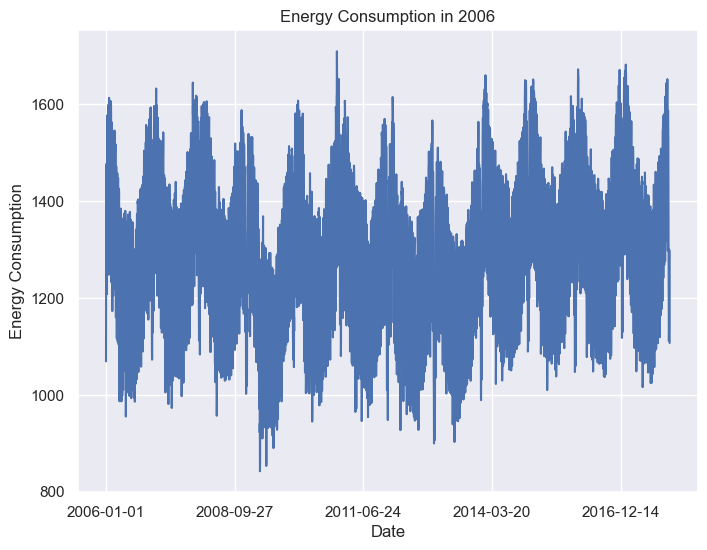

In [25]:
germany.Consumption.plot()
plt.title('Energy Consumption in 2006')
plt.ylabel('Energy Consumption')
plt.show()

# 7. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions in the `acquire.py` file and be able to re-run the functions and get the same data.

In [89]:
for i in range(len(merged_df)):
    ', '.join([str(item) for item in merged_df['starships'][i])

SyntaxError: closing parenthesis ')' does not match opening parenthesis '[' (708227596.py, line 2)

In [94]:
col = []
for i in range(len(merged_df)):
    string = ', '.join([str(item) for item in merged_df['starships'][i]])
    col.append(string)
merged_df['clean_starships'] = col

In [96]:
merged_df.head(3)

,name_x,height,mass,hair_color,skin_color,eye_color,birth_year,gender,homeworld,films_x,...,gravity,terrain,surface_water,population,residents,films_y,created_y,edited_y,url_y,clean_starships
0,Luke Skywalker,172,77,blond,fair,blue,19BBY,male,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",...,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/,"https://swapi.dev/api/starships/12/, https://s..."
1,C-3PO,167,75,n/a,gold,yellow,112BBY,n/a,https://swapi.dev/api/planets/1/,"[https://swapi.dev/api/films/1/, https://swapi...",...,1 standard,desert,1,200000,"[https://swapi.dev/api/people/1/, https://swap...","[https://swapi.dev/api/films/1/, https://swapi...",2014-12-09T13:50:49.641000Z,2014-12-20T20:58:18.411000Z,https://swapi.dev/api/planets/1/,
2,R2-D2,96,32,n/a,"white, blue",red,33BBY,n/a,https://swapi.dev/api/planets/8/,"[https://swapi.dev/api/films/1/, https://swapi...",...,1 standard,"grassy hills, swamps, forests, mountains",12,4500000000,"[https://swapi.dev/api/people/3/, https://swap...","[https://swapi.dev/api/films/3/, https://swapi...",2014-12-10T11:52:31.066000Z,2014-12-20T20:58:18.430000Z,https://swapi.dev/api/planets/8/,


In [120]:
pd.merge((pd.merge(left=people.explode('starships'),
                            right=starship,
                            left_on='starships',
                            right_on='url',
                            how='left', suffixes=['_ppl', '_ships'])), planet,
         left_on="homeworld",
         right_on="url",
         how="left").T

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
name_ppl,Luke Skywalker,Luke Skywalker,C-3PO,R2-D2,Darth Vader,Leia Organa,Owen Lars,Beru Whitesun lars,R5-D4,Biggs Darklighter,...,Jocasta Nu,R4-P17,Wat Tambor,San Hill,Shaak Ti,Grievous,Tarfful,Raymus Antilles,Sly Moore,Tion Medon
height,172,172,167,96,202,150,178,165,97,183,...,167,96,193,191,178,216,234,188,178,206
mass,77,77,75,32,136,49,120,75,32,84,...,unknown,unknown,48,unknown,57,159,136,79,48,80
hair_color,blond,blond,n/a,n/a,none,brown,"brown, grey",brown,n/a,black,...,white,none,none,none,none,none,brown,brown,none,none
skin_color,fair,fair,gold,"white, blue",white,light,light,light,"white, red",light,...,fair,"silver, red","green, grey",grey,"red, blue, white","brown, white",brown,light,pale,grey
eye_color,blue,blue,yellow,red,yellow,brown,blue,blue,red,brown,...,blue,"red, blue",unknown,gold,black,"green, yellow",blue,brown,white,black
birth_year,19BBY,19BBY,112BBY,33BBY,41.9BBY,19BBY,52BBY,47BBY,unknown,24BBY,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
gender,male,male,n/a,n/a,male,female,male,female,n/a,male,...,female,female,male,male,female,male,male,male,female,male
homeworld,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/8/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/2/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,...,https://swapi.dev/api/planets/9/,https://swapi.dev/api/planets/28/,https://swapi.dev/api/planets/56/,https://swapi.dev/api/planets/57/,https://swapi.dev/api/planets/58/,https://swapi.dev/api/planets/59/,https://swapi.dev/api/planets/14/,https://swapi.dev/api/planets/2/,https://swapi.dev/api/planets/60/,https://swapi.dev/api/planets/12/
films_ppl,"[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/films/1/],[https://swapi.dev/api/films/1/],...,[https://swapi.dev/api/films/5/],"[https://swapi.dev/api/films/5/, https://swapi...",[https://swapi.dev/api/films/5/],[https://swapi.dev/api/films/5/],"[https://swapi.dev/api/films/5/, https://swapi...",[https://swapi.dev/api/films/6/],[https://swapi.dev/api/films/6/],"[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/5/, https://swapi...",[https://swapi.dev/api/films/6/]


In [122]:
ppl_planet_df = pd.merge(people, planet, left_on='homeworld', right_on='url', how='left', suffixes=['_people', '_planets'])


pd.merge(left=ppl_planet_df.explode('starships'),
                            right=starship,
                            left_on='starships',
                            right_on='url',
                            how='left', suffixes=['_ppl_plnt', '_ships']).T

,0,1,2,3,4,5,6,7,8,9,...,83,84,85,86,87,88,89,90,91,92
name_people,Luke Skywalker,Luke Skywalker,C-3PO,R2-D2,Darth Vader,Leia Organa,Owen Lars,Beru Whitesun lars,R5-D4,Biggs Darklighter,...,Jocasta Nu,R4-P17,Wat Tambor,San Hill,Shaak Ti,Grievous,Tarfful,Raymus Antilles,Sly Moore,Tion Medon
height,172,172,167,96,202,150,178,165,97,183,...,167,96,193,191,178,216,234,188,178,206
mass,77,77,75,32,136,49,120,75,32,84,...,unknown,unknown,48,unknown,57,159,136,79,48,80
hair_color,blond,blond,n/a,n/a,none,brown,"brown, grey",brown,n/a,black,...,white,none,none,none,none,none,brown,brown,none,none
skin_color,fair,fair,gold,"white, blue",white,light,light,light,"white, red",light,...,fair,"silver, red","green, grey",grey,"red, blue, white","brown, white",brown,light,pale,grey
eye_color,blue,blue,yellow,red,yellow,brown,blue,blue,red,brown,...,blue,"red, blue",unknown,gold,black,"green, yellow",blue,brown,white,black
birth_year,19BBY,19BBY,112BBY,33BBY,41.9BBY,19BBY,52BBY,47BBY,unknown,24BBY,...,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown,unknown
gender,male,male,n/a,n/a,male,female,male,female,n/a,male,...,female,female,male,male,female,male,male,male,female,male
homeworld,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/8/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/2/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,https://swapi.dev/api/planets/1/,...,https://swapi.dev/api/planets/9/,https://swapi.dev/api/planets/28/,https://swapi.dev/api/planets/56/,https://swapi.dev/api/planets/57/,https://swapi.dev/api/planets/58/,https://swapi.dev/api/planets/59/,https://swapi.dev/api/planets/14/,https://swapi.dev/api/planets/2/,https://swapi.dev/api/planets/60/,https://swapi.dev/api/planets/12/
films_people,"[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/1/, https://swapi...",[https://swapi.dev/api/films/1/],[https://swapi.dev/api/films/1/],...,[https://swapi.dev/api/films/5/],"[https://swapi.dev/api/films/5/, https://swapi...",[https://swapi.dev/api/films/5/],[https://swapi.dev/api/films/5/],"[https://swapi.dev/api/films/5/, https://swapi...",[https://swapi.dev/api/films/6/],[https://swapi.dev/api/films/6/],"[https://swapi.dev/api/films/1/, https://swapi...","[https://swapi.dev/api/films/5/, https://swapi...",[https://swapi.dev/api/films/6/]
